# <center>Concrete Compressive Strength Prediction 🧱<center>

<center><img width="750px" src="https://cdn.pixabay.com/photo/2015/03/27/18/30/crack-695010_960_720.jpg"></center>

# About the Dataset

* **Cement** (component 1) -- quantitative -- kg in a m3 mixture -- *Input Variable*
* **Blast** Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- *Input Variable*
* **Fly Ash** (component 3) -- quantitative -- kg in a m3 mixture -- *Input Variable*
* **Water** (component 4) -- quantitative -- kg in a m3 mixture -- *Input Variable*
* **Superplasticizer** (component 5) -- quantitative -- kg in a m3 mixture -- *Input Variable*
* **Coarse Aggregate** (component 6) -- quantitative -- kg in a m3 mixture -- *Input Variable*
* **Fine Aggregate** (component 7) -- quantitative -- kg in a m3 mixture -- *Input Variable*
* **Age** -- quantitative -- Day (1~365) -- *Input Variable*
* **Concrete Compressive Strength** -- quantitative -- MPa -- *Output Variable*

# Importing the Essential Libraries, Metrics and Models

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Loading the Data

In [2]:
df = pd.read_csv("../input/yeh-concret-data/Concrete_Data_Yeh.csv")

# Exploratory Data Analysis

***Taking a look at the first 5 rows of the dataset.***

In [3]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


***Checking the shape—i.e. size—of the data.***

In [4]:
df.shape

(1030, 9)

***Learning the dtypes of columns' and how many non-null values are there in those columns.***

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


***Getting the statistical summary of dataset.***

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
flyash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseaggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineaggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
csMPa,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


# Handling Missing Values and Duplicates

***It seems that there is no missing value in the columns.***

In [7]:
df.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

***Checking for duplicates in data and it can easily seen that there are 25 duplicated values.***

In [8]:
df.duplicated().sum()

25

***Dropping all the duplicated values from the dataset.***

In [9]:
df.drop_duplicates(inplace=True)

# Data Visualization

***Visualizing the Correlation between the numerical variables using pairplot visualization.***

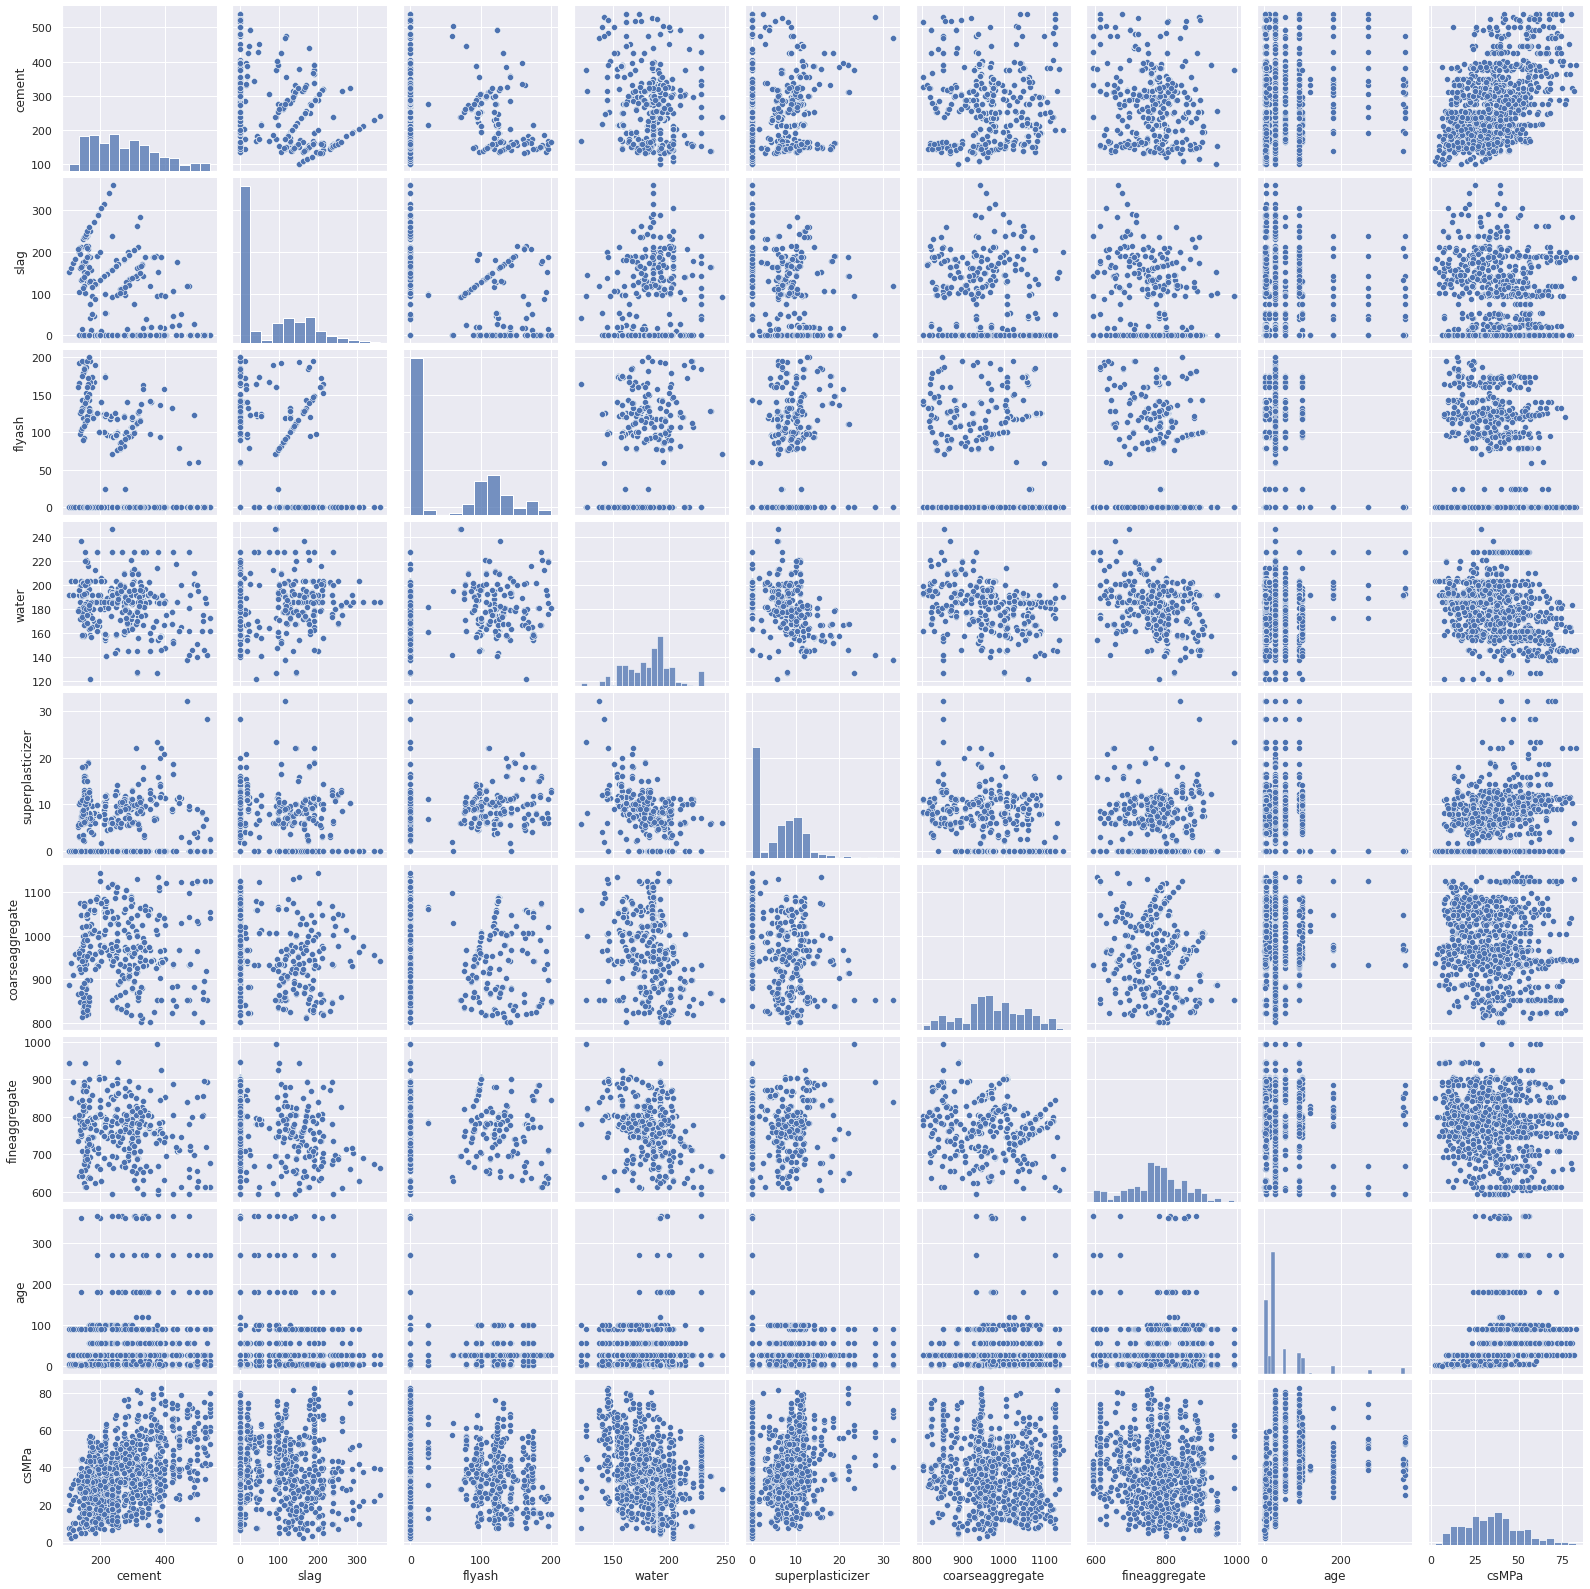

In [10]:
sns.set_theme()
sns.pairplot(df)

<h2 style="font-family: Times New Roman">Distribution of Each Variable</h2>

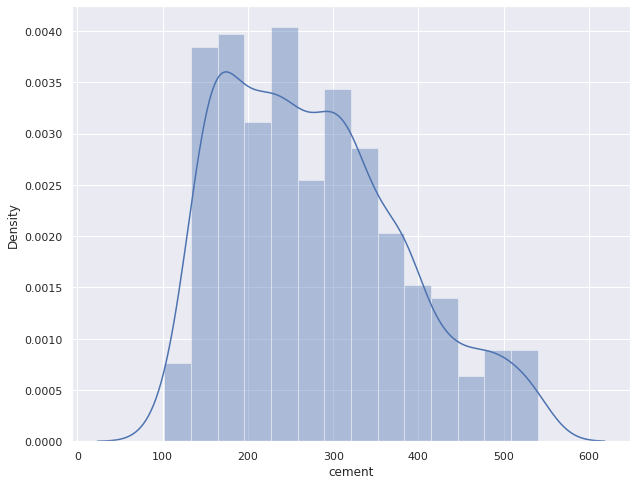

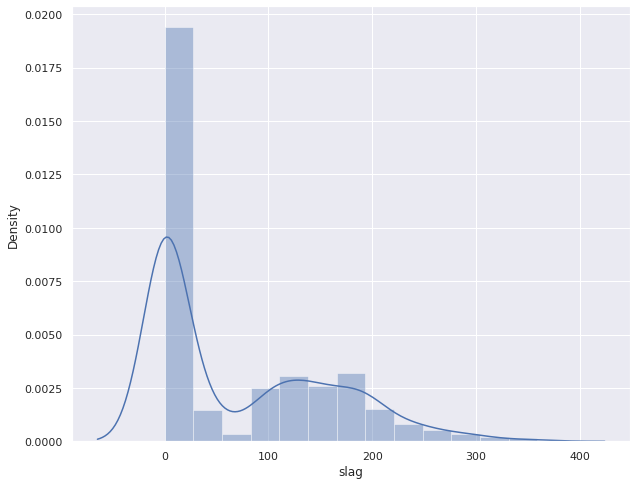

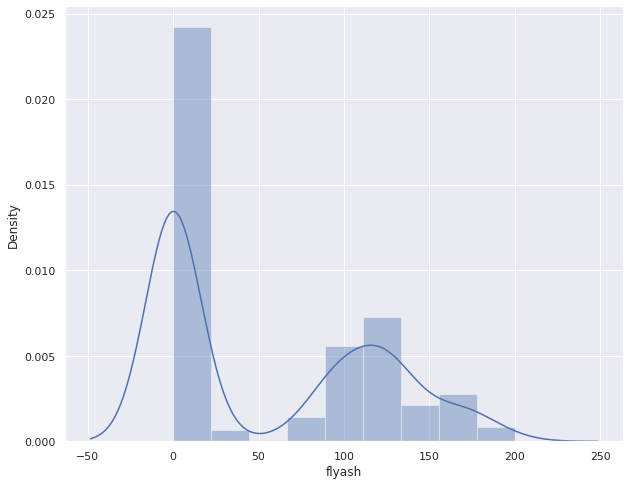

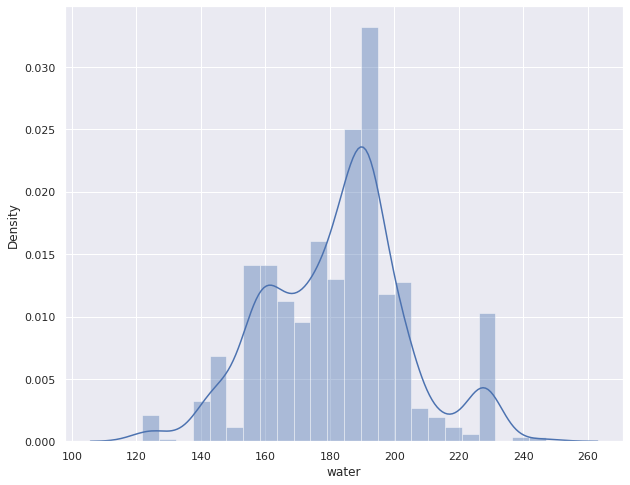

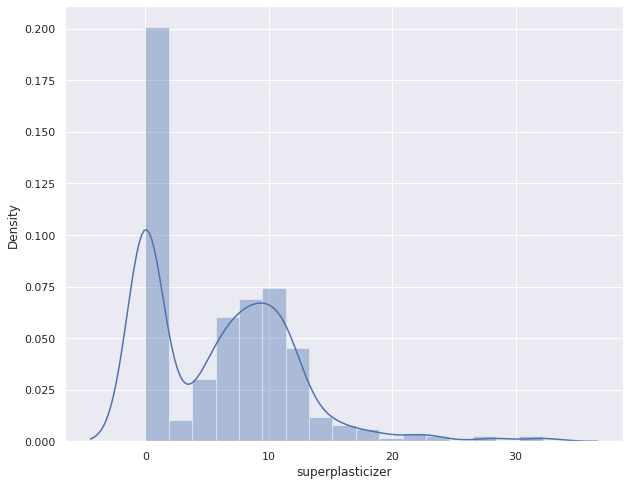

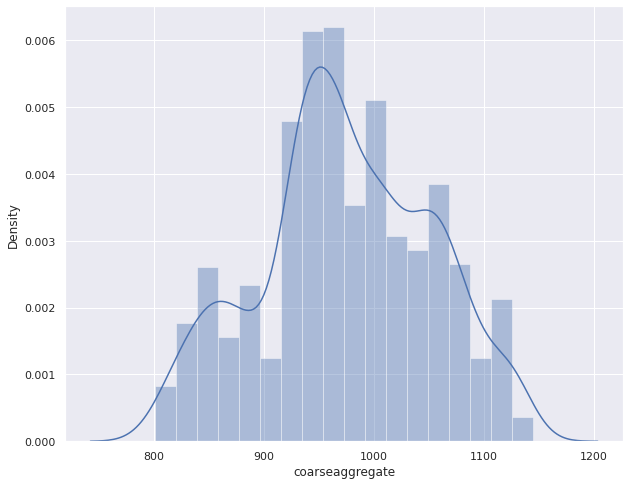

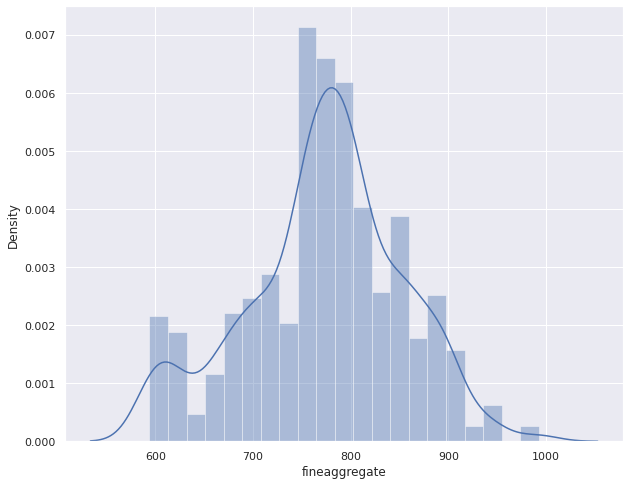

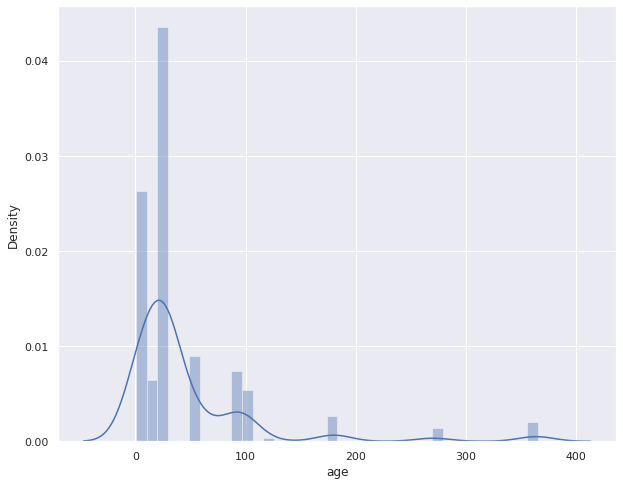

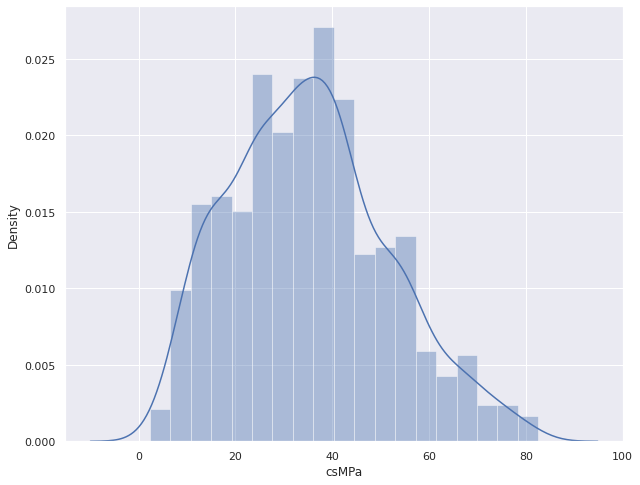

In [11]:
for col in df.columns:
    plt.figure(figsize=(10,8))
    sns.distplot(df[col])
    plt.show()

<h2 style="font-family: Times New Roman">Relationship Between Each Variable and Target Variable (csMPa)</h2>

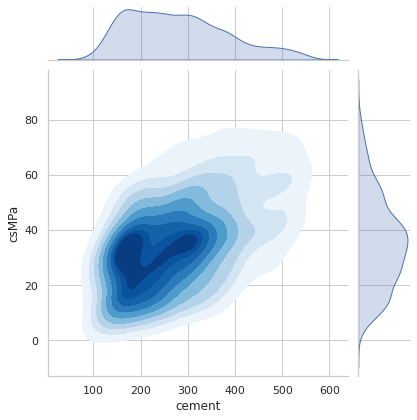

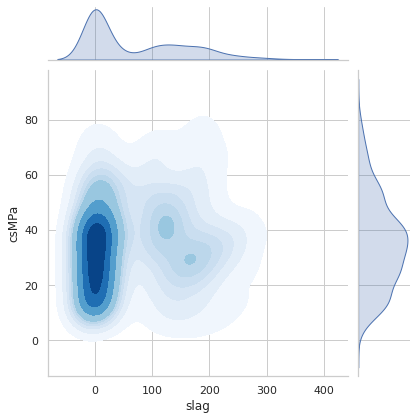

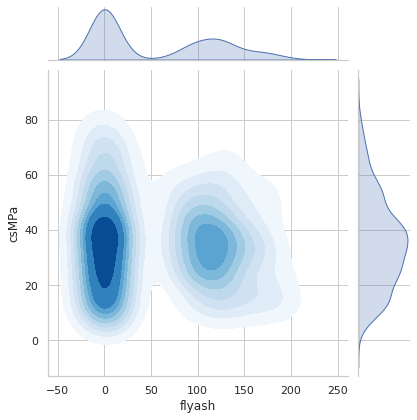

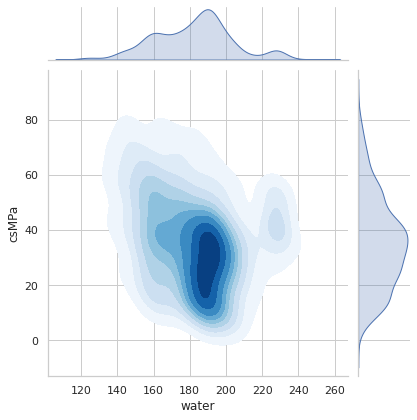

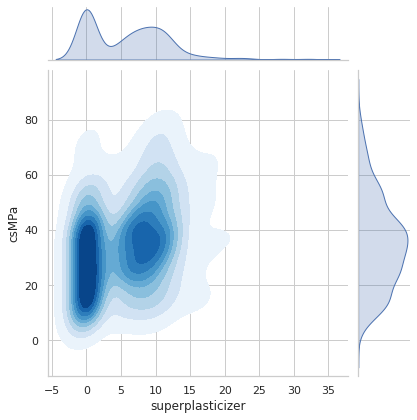

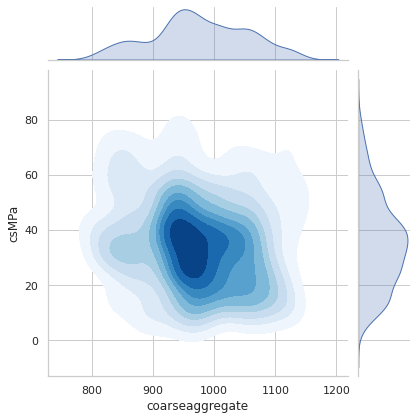

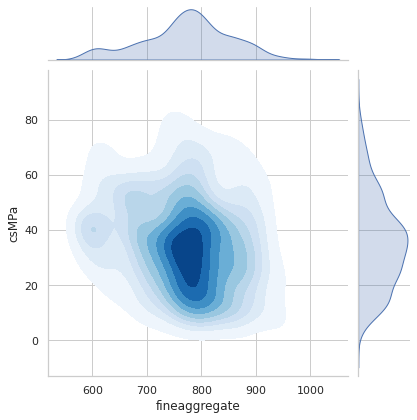

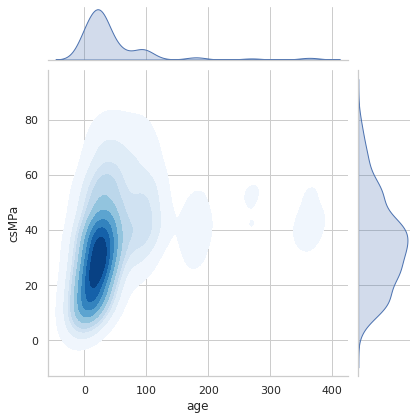

In [12]:
sns.set(style="whitegrid")

cols_without_y = df.drop("csMPa", axis=1).columns
for col in cols_without_y:
    sns.jointplot(x=df[col], y=df["csMPa"], kind="kde", cmap="Blues", fill=True)
    plt.show()

***Visualizing the linear correlations between variables using Heatmap visualization. The measure used for finding the linear correlation between each variable is Pearson Correlation Coefficient.***

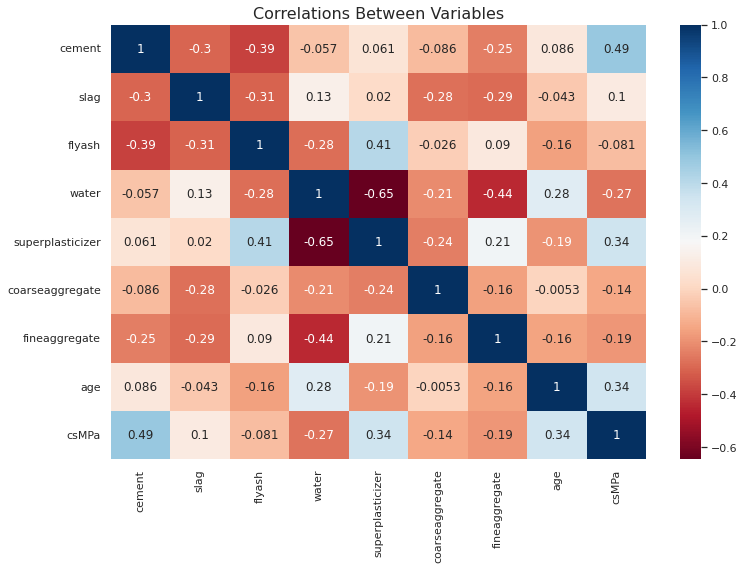

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.title("Correlations Between Variables", size=16)
plt.show()

# X, y Split

In [14]:
X = df.drop("csMPa", axis=1)
y = df["csMPa"]

# Data Standardization

***Standardizing the numerical columns in X dataset. StandardScaler() adjusts the mean of the features as 0 and standard deviation of features as 1. Formula that StandardScaler() uses is as follows:***

<center><img width="270px" src="https://www.thoughtco.com/thmb/gItmqGd5HlnhyPIiLm1YHXOlTnw=/330x242/filters:fill(auto,1)/zscore-56a8fa785f9b58b7d0f6e87b.GIF"></center>

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split

***Splitting the data into Train and Test chunks for better evaluation.***

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Defining several evaluation functions for convenience.***

In [17]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

def evaluate(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    r_squared = r2_score(y, predictions)
    return mae, mse, r_squared

# Machine Learning Models

In [18]:
models = pd.DataFrame(columns=["Model", "MAE", "MSE", "r2 Score", "RMSE (Cross Validated)"])

<h2 style="font-family: Times New Roman">Linear Regression</h2>

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(lin_reg)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 8.895256221464194
MSE: 125.2456480505019
r2 Score: 0.5801703029028777
RMSE (Cross Validated): 10.983075882282813


<h2 style="font-family: Times New Roman">Lasso (L1 Regularization)</h2>

In [20]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(lasso)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 9.617364704879583
MSE: 145.40747785043212
r2 Score: 0.5125868376920519
RMSE (Cross Validated): 11.612295575311416


<h2 style="font-family: Times New Roman">Ridge (L2 Regularization)</h2>

In [21]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(ridge)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 8.89765623653853
MSE: 125.29151747112725
r2 Score: 0.5800165463032121
RMSE (Cross Validated): 10.975634268892312


<h2 style="font-family: Times New Roman">Elastic Net</h2>

In [22]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(elastic_net)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 10.31068489827418
MSE: 165.41911772772988
r2 Score: 0.4455068166384266
RMSE (Cross Validated): 12.418741937178366


<h2 style="font-family: Times New Roman">Support Vector Machines</h2>

In [23]:
svr = SVR()
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(svr)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 8.392100960800368
MSE: 120.4010254462397
r2 Score: 0.5964097209757289
RMSE (Cross Validated): 12.030395231584913


<h2 style="font-family: Times New Roman">Random Forest</h2>

In [24]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
predictions = rfr.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(rfr)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 3.566459126984128
MSE: 26.914414279997267
r2 Score: 0.9097815327670187
RMSE (Cross Validated): 10.075028175085532


<h2 style="font-family: Times New Roman">XGBoost</h2>

In [25]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(xgb)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 2.6311534056022987
MSE: 17.495195623073545
r2 Score: 0.9413552263618118
RMSE (Cross Validated): 9.324257827263114


# Model Comparison

In [26]:
models.sort_values(by="RMSE (Cross Validated)")

,Model,MAE,MSE,r2 Score,RMSE (Cross Validated)
6,XGBRegressor,2.631153,17.495196,0.941355,9.324258
5,RandomForestRegressor,3.566459,26.914414,0.909782,10.075028
2,Ridge,8.897656,125.291517,0.580017,10.975634
0,LinearRegression,8.895256,125.245648,0.580170,10.983076
1,Lasso,9.617365,145.407478,0.512587,11.612296
4,SVR,8.392101,120.401025,0.596410,12.030395
3,ElasticNet,10.310685,165.419118,0.445507,12.418742


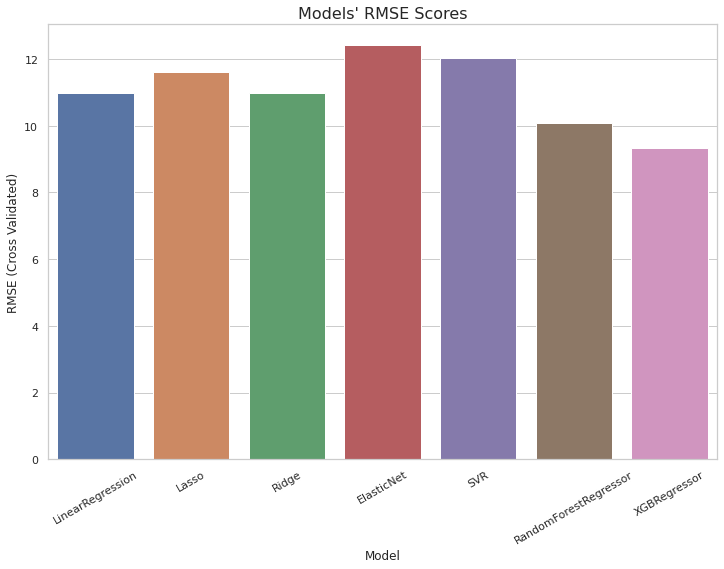

In [27]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross Validated)"])
plt.title("Models' RMSE Scores", size=16)
plt.xticks(rotation=30)
plt.show()

# Hyperparameter Tuning

In [28]:
tuned_models = pd.DataFrame(columns=["Tuned Model", "MAE", "MSE", "r2 Score", "RMSE (Cross Validated)"])

<h2 style="font-family: Times New Roman">Tuning the Lasso</h2>

In [29]:
lasso_grid_params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}

lasso_grid = GridSearchCV(Lasso(), lasso_grid_params, cv=5, scoring="neg_mean_squared_error", verbose=0, n_jobs=-1)

lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [30]:
lasso_params = lasso_grid.best_params_

tuned_lasso = Lasso(**lasso_params)
tuned_lasso.fit(X_train, y_train)
predictions = tuned_lasso.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(tuned_lasso)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Tuned Model": "Lasso","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
tuned_models = tuned_models.append(new_row, ignore_index=True)

MAE: 8.89740355769364
MSE: 125.28905603050151
r2 Score: 0.5800247971757049
RMSE (Cross Validated): 10.974755969862095


<h2 style="font-family: Times New Roman">Tuning the Ridge</h2>

In [31]:
ridge_grid_params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}

ridge_grid = GridSearchCV(Ridge(), ridge_grid_params, cv=5, scoring="neg_mean_squared_error", verbose=0, n_jobs=-1)

ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [32]:
ridge_params = ridge_grid.best_params_

tuned_ridge = Ridge(**ridge_params)
tuned_ridge.fit(X_train, y_train)
predictions = tuned_ridge.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(tuned_ridge)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Tuned Model": "Ridge","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
tuned_models = tuned_models.append(new_row, ignore_index=True)

MAE: 8.89765623653853
MSE: 125.29151747112725
r2 Score: 0.5800165463032121
RMSE (Cross Validated): 10.975634268892312


<h2 style="font-family: Times New Roman">Tuning the Elastic Net</h2>

In [33]:
elasticnet_grid_params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10],
                    "l1_ratio": np.arange(0, 1, 0.05)}

elasticnet_grid = GridSearchCV(ElasticNet(), elasticnet_grid_params, cv=5, scoring="neg_mean_squared_error", verbose=0, n_jobs=-1)

elasticnet_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
             scoring='neg_mean_squared_error')

In [34]:
elasticnet_params = elasticnet_grid.best_params_

tuned_elasticnet = ElasticNet(**elasticnet_params)
tuned_elasticnet.fit(X_train, y_train)
predictions = tuned_elasticnet.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(tuned_elasticnet)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Tuned Model": "Elastic Net","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
tuned_models = tuned_models.append(new_row, ignore_index=True)

MAE: 8.897165087948142
MSE: 125.28151716626996
r2 Score: 0.5800500678269094
RMSE (Cross Validated): 10.976968124113231


<h2 style="font-family: Times New Roman">Tuning the Support Vector Machines</h2>

In [35]:
svr_grid_params = {"kernel": ["linear", "rbf"],
                   "C": [1, 10, 100, 1000],
                   "epsilon": [0.001, 0.01, 0.1, 1, 10, 100],
                   "gamma": [0.001, 0.01, 0.1, 1]}

svr_grid = GridSearchCV(SVR(), svr_grid_params, cv=5, scoring="neg_mean_squared_error", verbose=0, n_jobs=-1)

svr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'epsilon': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [36]:
svr_params = svr_grid.best_params_

tuned_svr = SVR(**svr_params)
tuned_svr.fit(X_train, y_train)
predictions = tuned_svr.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(tuned_svr)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Tuned Model": "SVR","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
tuned_models = tuned_models.append(new_row, ignore_index=True)

MAE: 4.000182878790917
MSE: 39.40508236217269
r2 Score: 0.8679121865733217
RMSE (Cross Validated): 12.796024212072169


<h2 style="font-family: Times New Roman">Tuning the Random Forest</h2>

In [37]:
rfr_grid_params = {"n_estimators": [100, 200, 500],
                   "max_depth": [None, 2, 3, 5],
                   "min_samples_split": [2, 5, 10],
                   "min_samples_leaf": [1, 2, 5]}

rfr_grid = GridSearchCV(RandomForestRegressor(), rfr_grid_params, cv=5, scoring="neg_mean_squared_error", verbose=0, n_jobs=-1)

rfr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 5],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='neg_mean_squared_error')

In [38]:
rfr_params = rfr_grid.best_params_

tuned_rfr = RandomForestRegressor(**rfr_params)
tuned_rfr.fit(X_train, y_train)
predictions = tuned_rfr.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(tuned_rfr)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Tuned Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
tuned_models = tuned_models.append(new_row, ignore_index=True)

MAE: 3.5287494444444505
MSE: 27.584284184879184
r2 Score: 0.9075360952317548
RMSE (Cross Validated): 10.105019519923019


# Model Comparison After Hyperparameter Tuning

In [39]:
tuned_models.sort_values(by="RMSE (Cross Validated)")

,Tuned Model,MAE,MSE,r2 Score,RMSE (Cross Validated)
4,RandomForestRegressor,3.528749,27.584284,0.907536,10.105020
0,Lasso,8.897404,125.289056,0.580025,10.974756
1,Ridge,8.897656,125.291517,0.580017,10.975634
2,Elastic Net,8.897165,125.281517,0.580050,10.976968
3,SVR,4.000183,39.405082,0.867912,12.796024


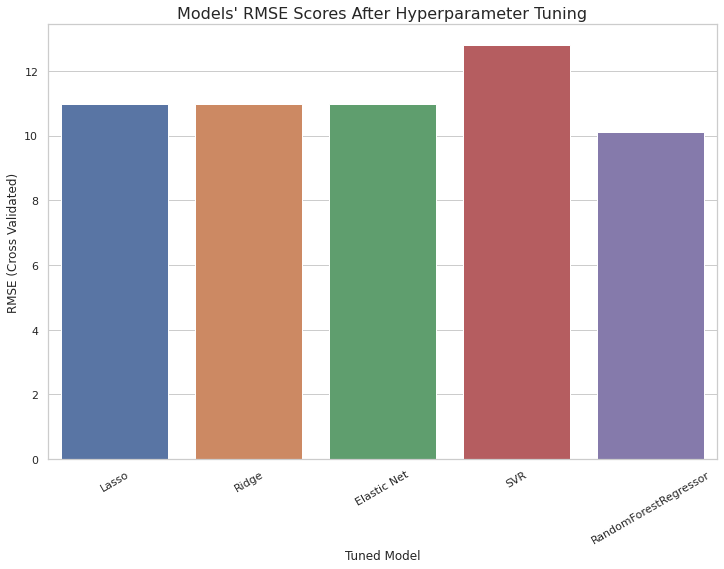

In [40]:
plt.figure(figsize=(12,8))
sns.barplot(x=tuned_models["Tuned Model"], y=tuned_models["RMSE (Cross Validated)"])
plt.title("Models' RMSE Scores After Hyperparameter Tuning", size=16)
plt.xticks(rotation=30)
plt.show()

# Conclusion

<h2 style="font-family: Times New Roman;">After Model Building and Hyperparameter Tuning processes, we can observe that even though we didn't apply Hyperparameter Tuning to XGBRegressor model, that is the one which yields the least RMSE score and the most R2 score.</h2>

<h3 style="font-family: Times New Roman">Thank you so much for reading notebook. Preparing notebooks are taking a great deal of time. If you liked it, please do not forget to give upvote. Peace Out ✌️ ...</h3>